In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import data_catalog
import tseries_mod
import esmlab_wrap

In [2]:
data_catalog.set_catalog('experiments')
varnames = ['CO2', 'SFCO2_LND', 'SFCO2_OCN']

active catalog: experiments


In [3]:
experiment = 'esm-piControl'
esm_piControl = tseries_mod.tseries_get_vars(varnames, 'atm', experiment)
da = esm_piControl['CO2'].isel(lev=-1)
da.name = 'CO2_BOT'
esm_piControl = xr.merge((esm_piControl, da))
# print(esm_piControl)
# print(esm_piControl.time)

In [4]:
esm_piControl_mon_anom = esmlab_wrap.compute_mon_anomaly(esm_piControl)
# print(esm_piControl_mon_anom)
# print(esm_piControl_mon_anom.time)

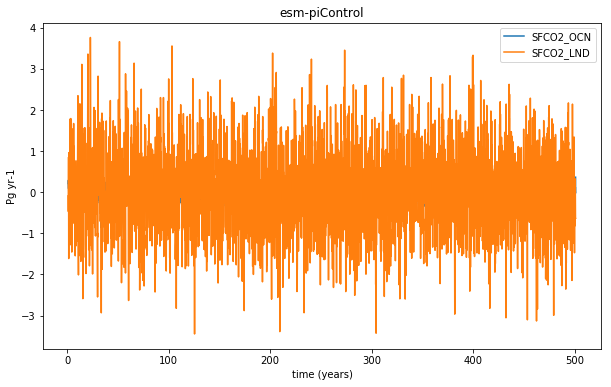

In [5]:
tseries_mod.tseries_plot_1ds(esm_piControl_mon_anom, ['SFCO2_OCN', 'SFCO2_LND'], title=experiment, region_val='Global')

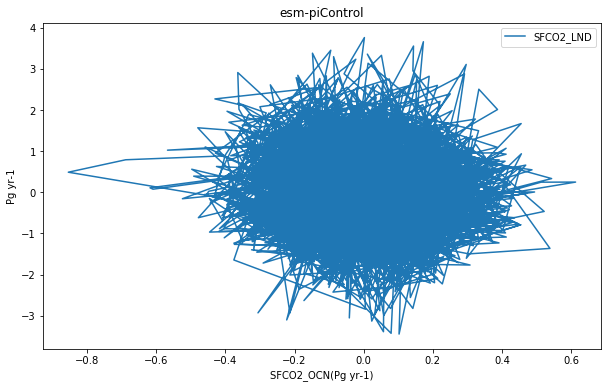

In [6]:
tseries_mod.tseries_plot_vars_vs_var(esm_piControl_mon_anom, 'SFCO2_OCN', ['SFCO2_LND'], title=experiment, region_val='Global')

In [7]:
esm_piControl_ann = esmlab_wrap.compute_ann_mean(esm_piControl)
# print(esm_piControl_ann)
# print(esm_piControl_ann.time)

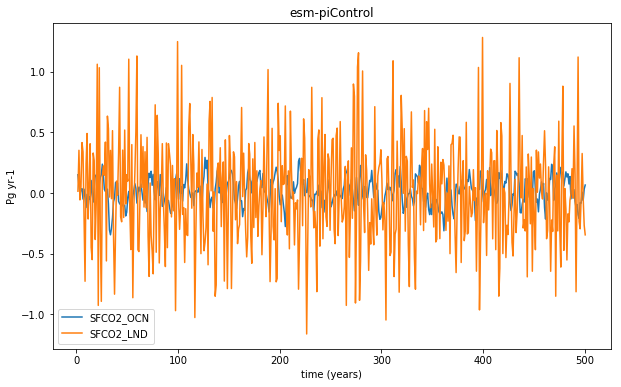

In [8]:
tseries_mod.tseries_plot_1ds(esm_piControl_ann, ['SFCO2_OCN', 'SFCO2_LND'], title=experiment, region_val='Global')

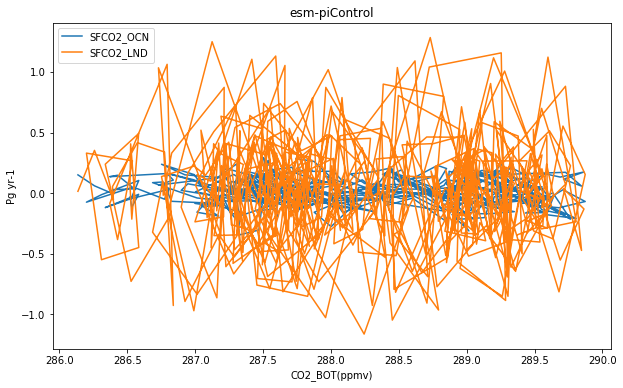

In [9]:
tseries_mod.tseries_plot_vars_vs_var(esm_piControl_ann, 'CO2_BOT', ['SFCO2_OCN', 'SFCO2_LND'], title=experiment, region_val='Global')

In [10]:
esm_piControl_mon_clim = esmlab_wrap.compute_mon_climatology(esm_piControl)
# print(esm_piControl_mon_clim)
# print(esm_piControl_mon_clim.time)